In [1]:
import torch
import torch.nn as nn
import torchvision # for the datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# MNIST DATASET 

In [4]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [6]:
# Hyper Parameters

input_size = 784 # 28*28
hidden_size = 100 # trail and error
num_classes = 10 
EPOCHS = 2
batch_size = 100
learning_rate = 0.001

In [12]:
# MNIST Dataloading

train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor() ) 

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,labels.shape) # 100 batch_size , 1 channel ( no color channel) , 28,28 pixels

torch.Size([100, 1, 28, 28]) torch.Size([100])


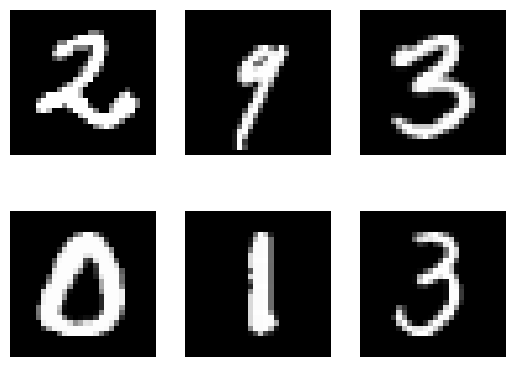

In [17]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0] , cmap='gray')
    plt.axis('off')

In [18]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.linear1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

model = NeuralNet(input_size,hidden_size,num_classes)

In [20]:
# Loss and Optimizer

criterion = nn.CrossEntropyLoss() # thats why we don't use softmax in NeuralNet Class
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [22]:
# Training Loop
n_total_steps = len(train_loader)

for epoch in range(EPOCHS):
    for i ,(images,labels) in enumerate(train_loader):
        # 100 , 1 ,28,28 ( Shape of image)
        # 100,784 (batches,input size)
        images = images.reshape(-1,28*28).to(device) # -1 auto configures
        labels = labels.to(device)
        
        # Forward Pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {EPOCHS}, step{i+1}/{n_total_steps} , loss = {loss.item():.4f}")
            
# Test and Evualating
with torch.no_grad():
    n_correct = 0  # correct predictions
    n_samples = 0
    
    for images in labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # torch.max returns value ,index ( prediction )
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0] # number of samples in the current batch ( should be 100)
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples # Accuracy score in percent
    print ( f"accuracy = {acc}")

epoch 1 / 2, step100/600 , loss = 0.3563
epoch 1 / 2, step200/600 , loss = 0.2956
epoch 1 / 2, step300/600 , loss = 0.3422
epoch 1 / 2, step400/600 , loss = 0.2226
epoch 1 / 2, step500/600 , loss = 0.1848
epoch 1 / 2, step600/600 , loss = 0.1641
epoch 2 / 2, step100/600 , loss = 0.1634
epoch 2 / 2, step200/600 , loss = 0.1357
epoch 2 / 2, step300/600 , loss = 0.1736
epoch 2 / 2, step400/600 , loss = 0.1385
epoch 2 / 2, step500/600 , loss = 0.3031
epoch 2 / 2, step600/600 , loss = 0.1402


TypeError: 'bool' object is not iterable